<a href="https://colab.research.google.com/github/piyush1856/time-series-and-recommendation-system/blob/main/01_Intro_to_Time_Series_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 01: Intro to Time Series and Forcasting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [ ]:
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg


Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 57.8MB/s]


In [ ]:
mobile_sales = pd.read_excel('/content/mobilesales.xlsx')
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.tail()

,DATE,Sales
212,2018-09-01,13838.0
213,2018-10-01,15351.0
214,2018-11-01,15615.0
215,2018-12-01,16941.0
216,2019-01-01,12160.0


In [ ]:
mobile_sales.dtypes

,0
DATE,datetime64[ns]
Sales,float64


In [ ]:
len(mobile_sales)

217

In [ ]:
mobile_sales.DATE.nunique()

217

In [ ]:
mobile_sales.DATE.describe()

,DATE
count,217
mean,2009-12-31 04:25:26.267281152
min,2001-01-01 00:00:00
25%,2005-07-01 00:00:00
50%,2010-01-01 00:00:00
75%,2014-07-01 00:00:00
max,2019-01-01 00:00:00


In [ ]:
mobile_sales.set_index('DATE', inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<Axes: xlabel='DATE'>

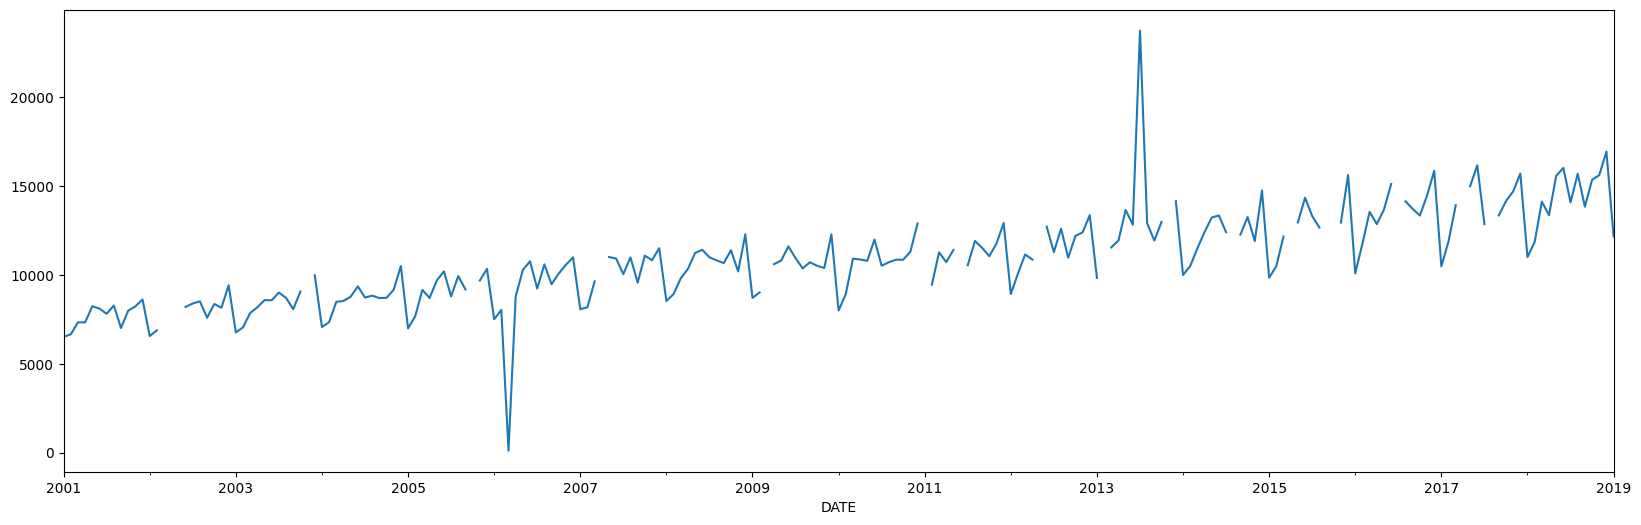

In [ ]:
mobile_sales.Sales.plot()

In [ ]:
mobile_sales.Sales.isna().sum()

19

In [ ]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


In [ ]:
mobile_sales.Sales.mean()

10842.757575757576

In [ ]:
mobile_sales.Sales.median()


10745.0

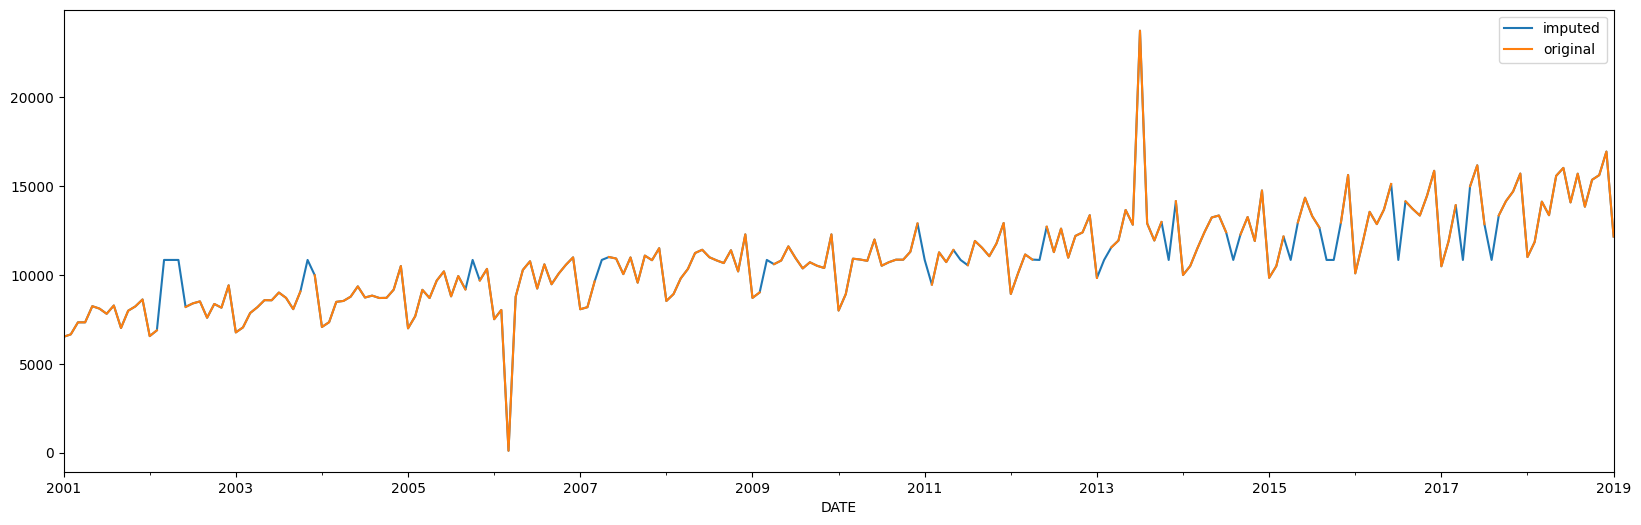

In [ ]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

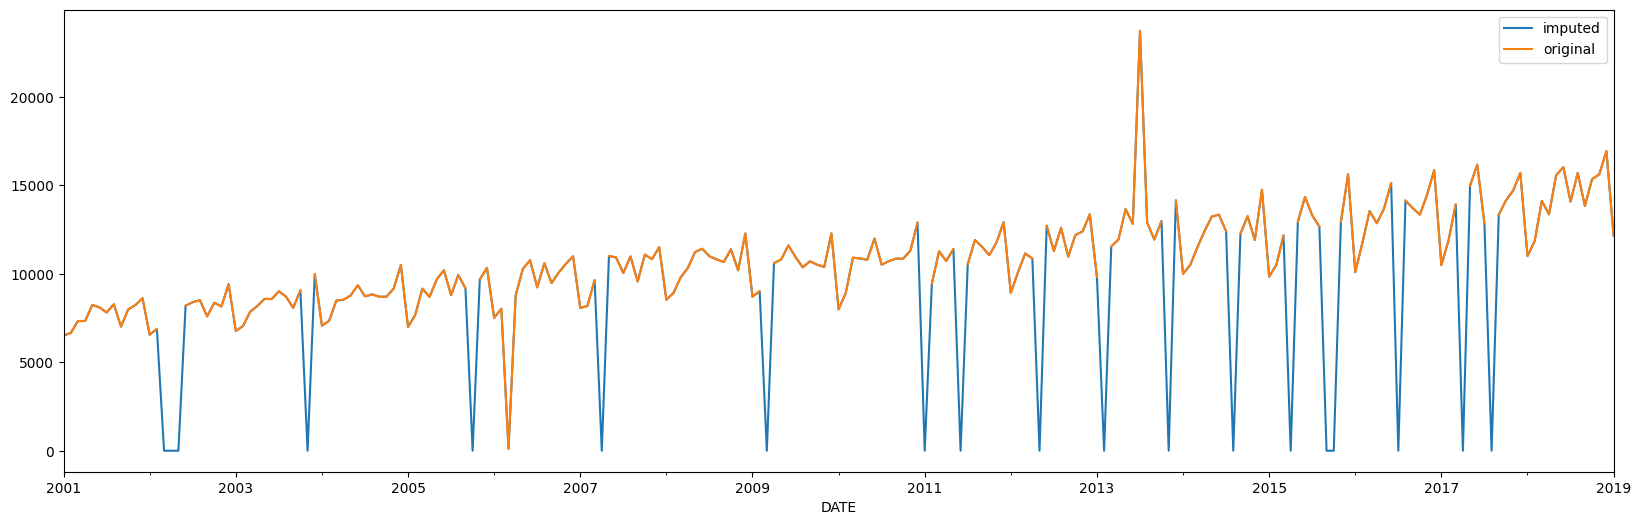

In [ ]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

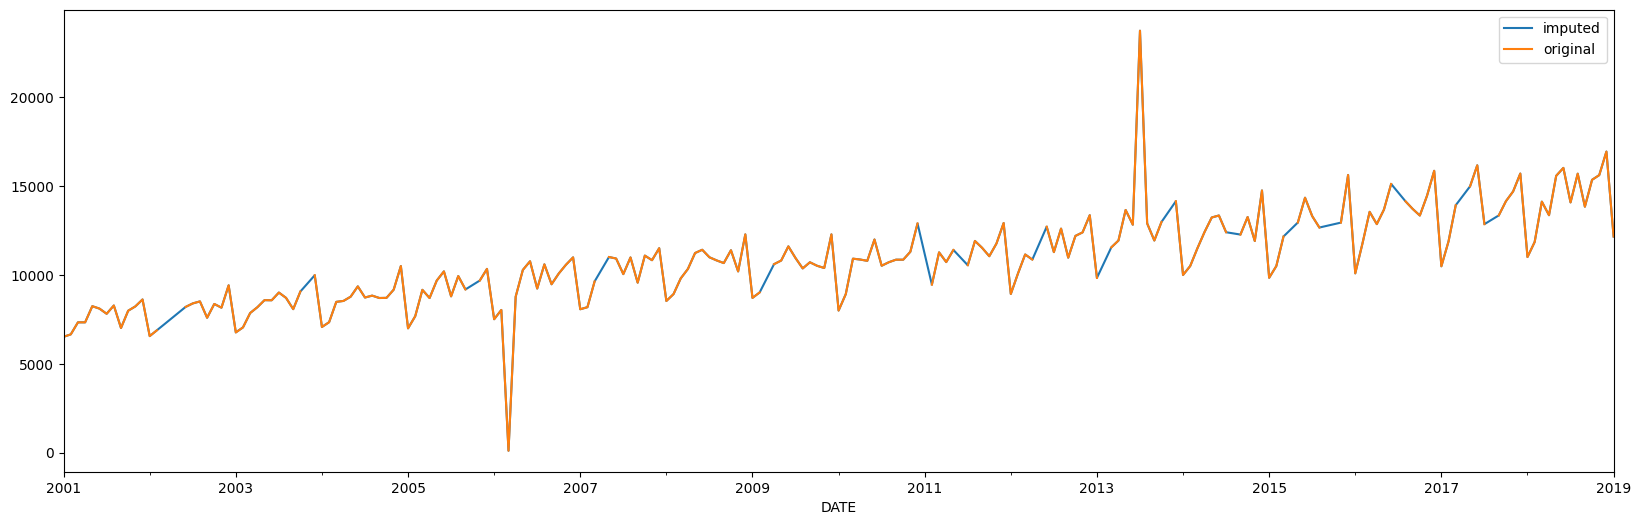

In [ ]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method='linear')

<Axes: xlabel='DATE'>

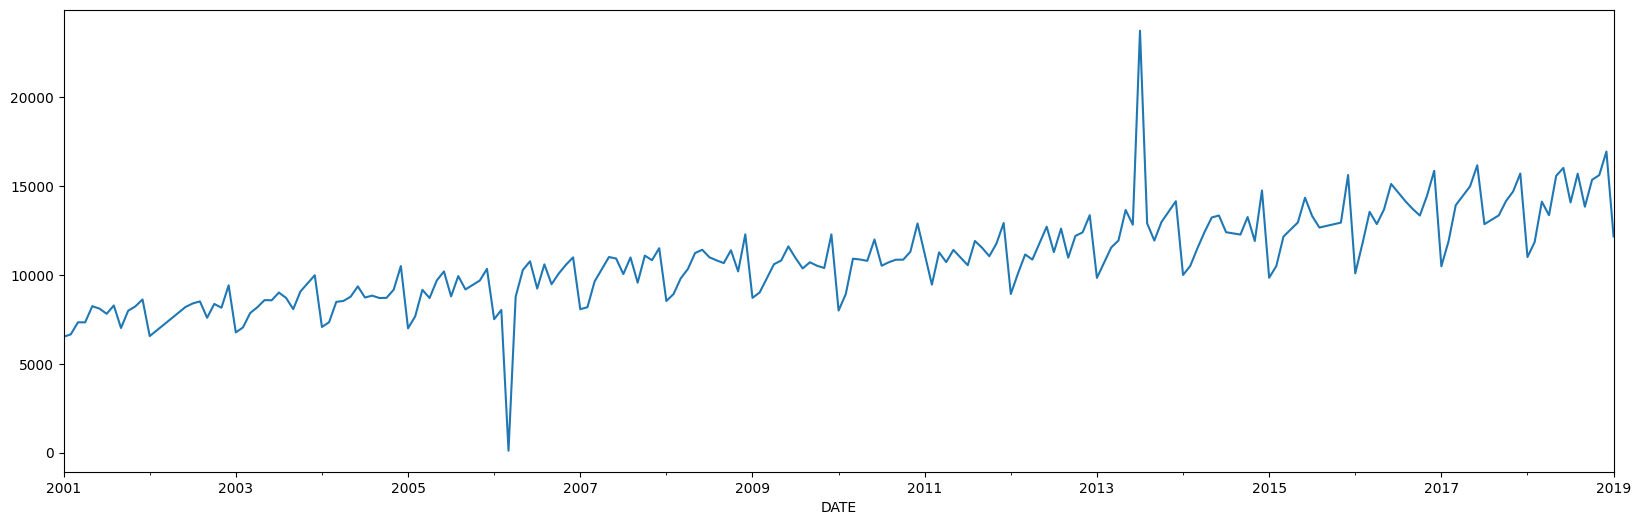

In [ ]:
mobile_sales.Sales.plot()

[]

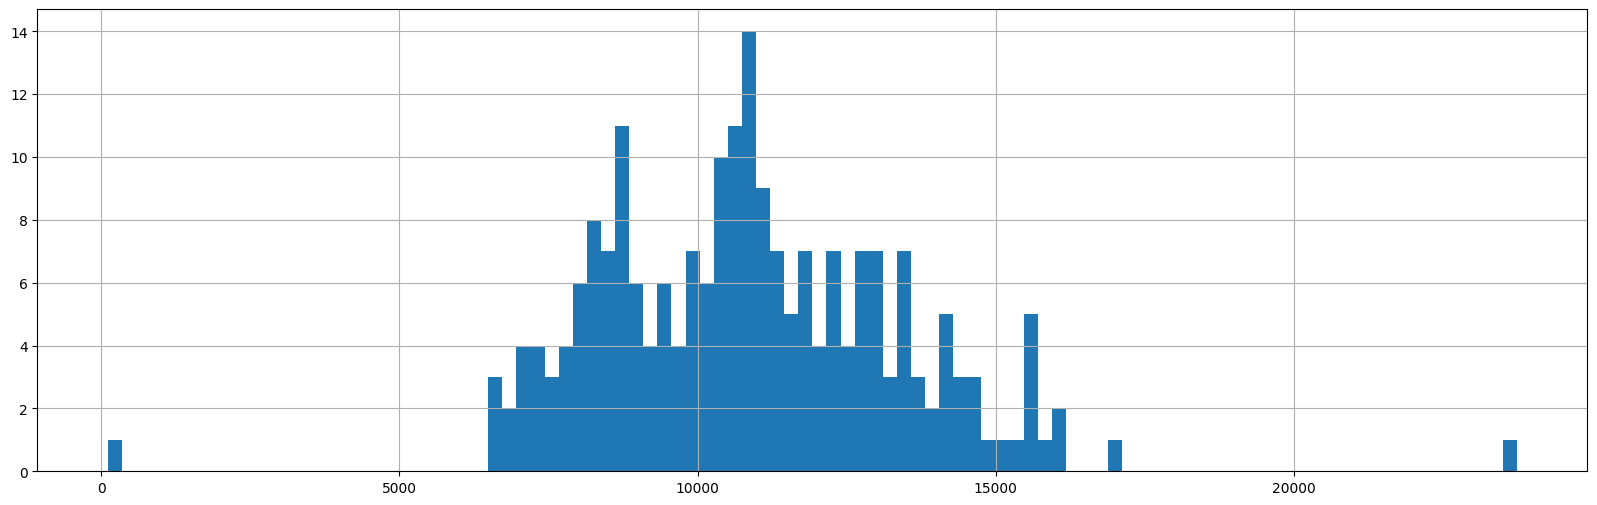

In [ ]:
mobile_sales.Sales.hist(bins=100).plot()


In [ ]:
mobile_sales.Sales.describe()


,Sales
count,217.000000
mean,10873.046083
std,2571.620954
min,108.000000
25%,8923.000000
50%,10793.000000
75%,12555.500000
max,23740.000000


In [ ]:
mobile_sales.Sales.quantile(0.95)


15164.599999999997

In [ ]:
mobile_sales.Sales.quantile(0.05)


7307.8

<Axes: xlabel='DATE'>

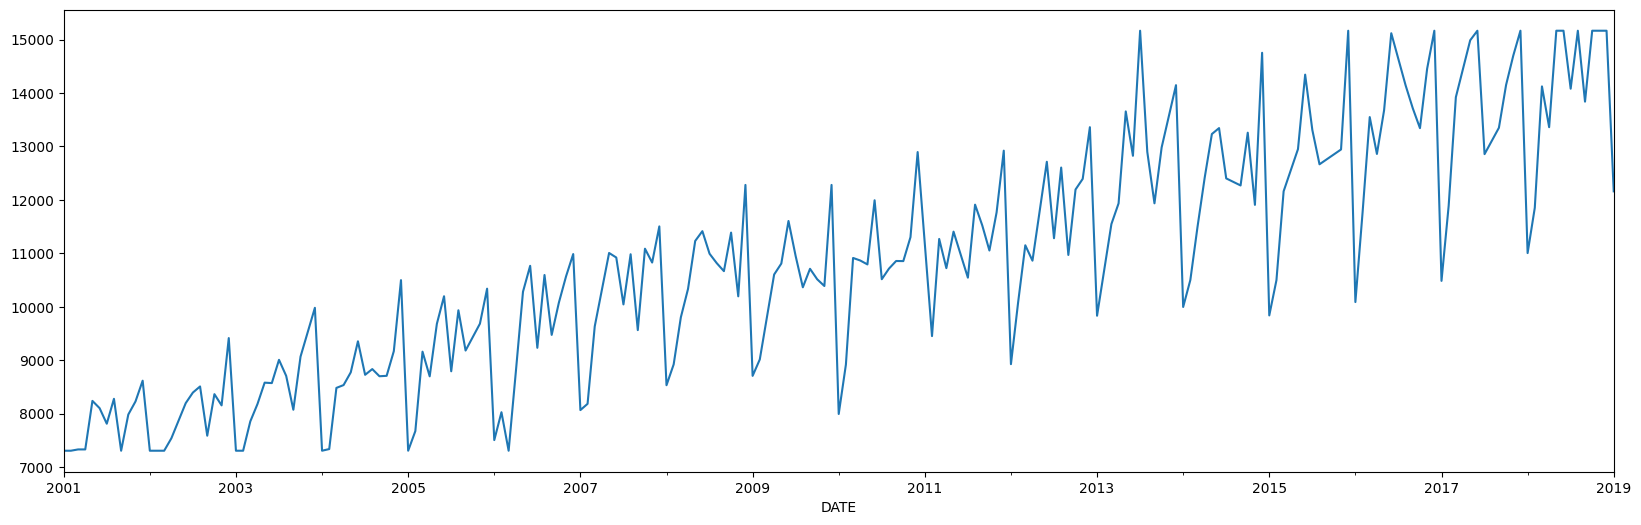

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()


<Axes: xlabel='DATE'>

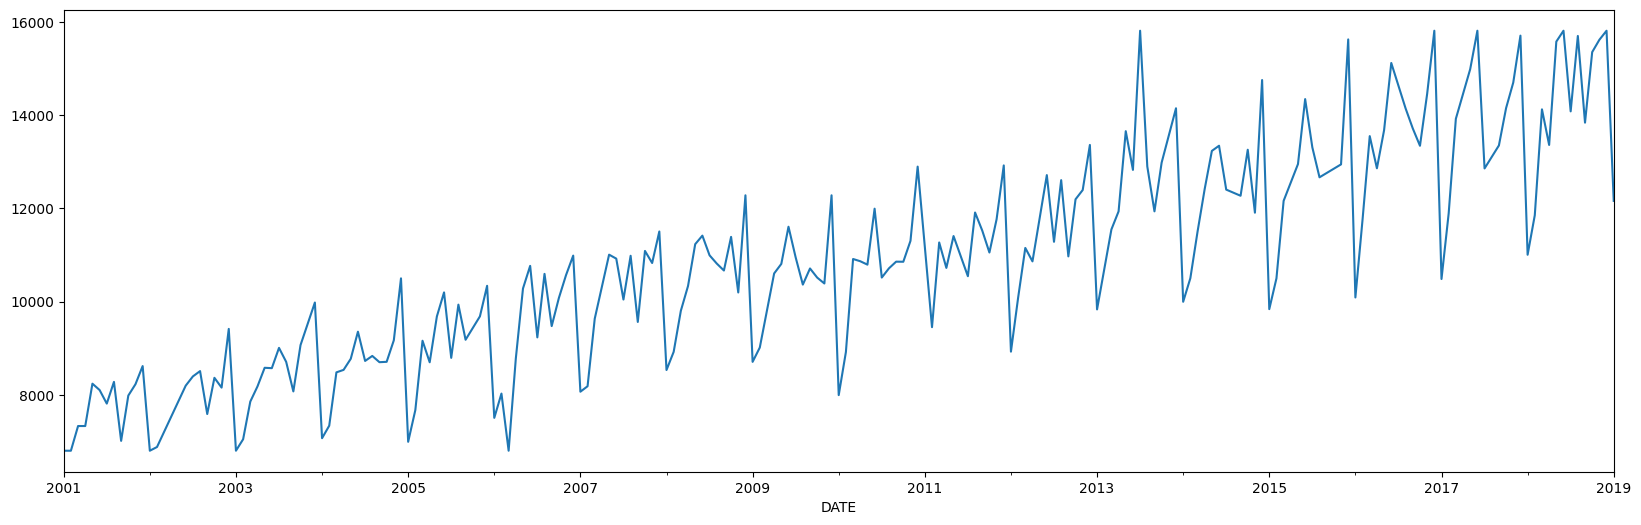

In [ ]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02)).plot()


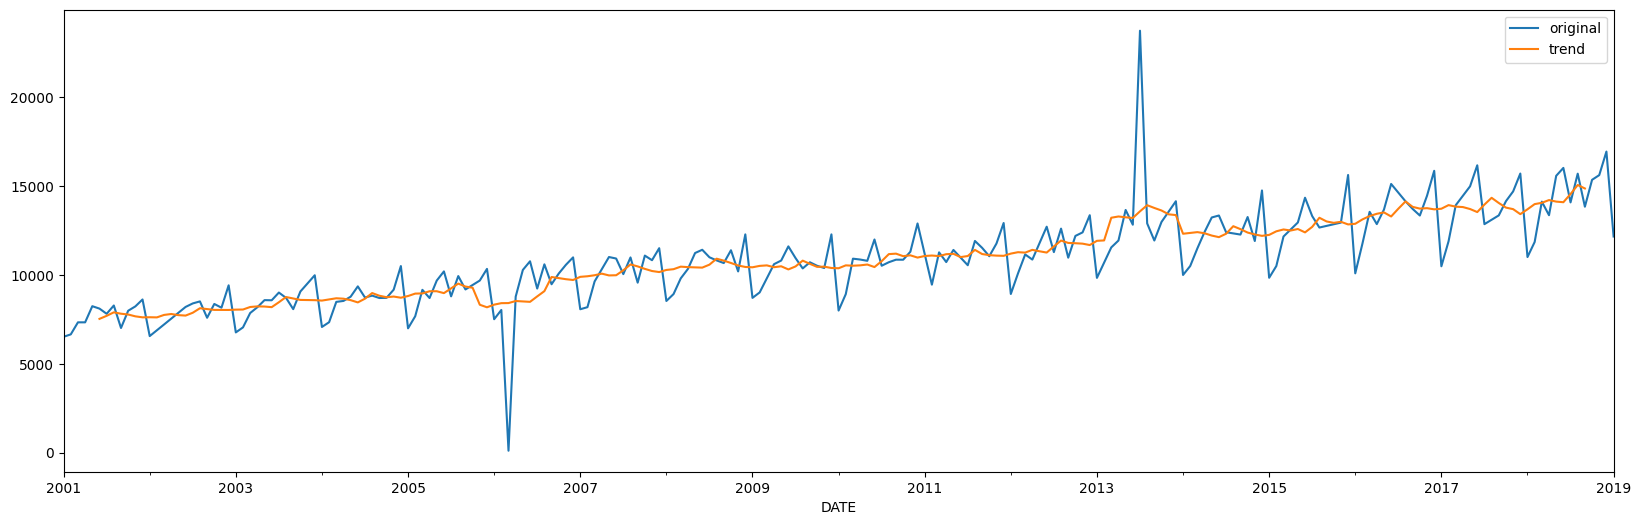

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(10, center=True).mean().plot(label='trend')

plt.legend()

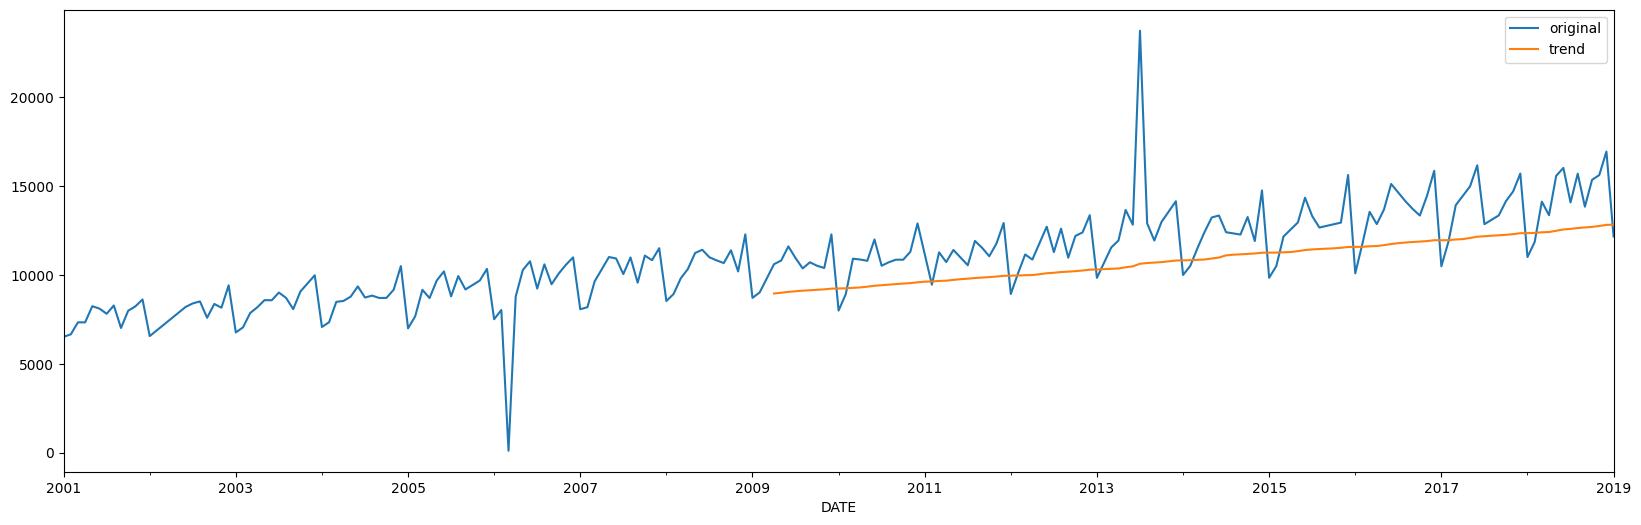

In [ ]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(100, center=False).mean().plot(label='trend')

plt.legend()



# LECTURE 02.TimeSeriesAnalysis-1




### Timeseries Decomposition

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model="additive")

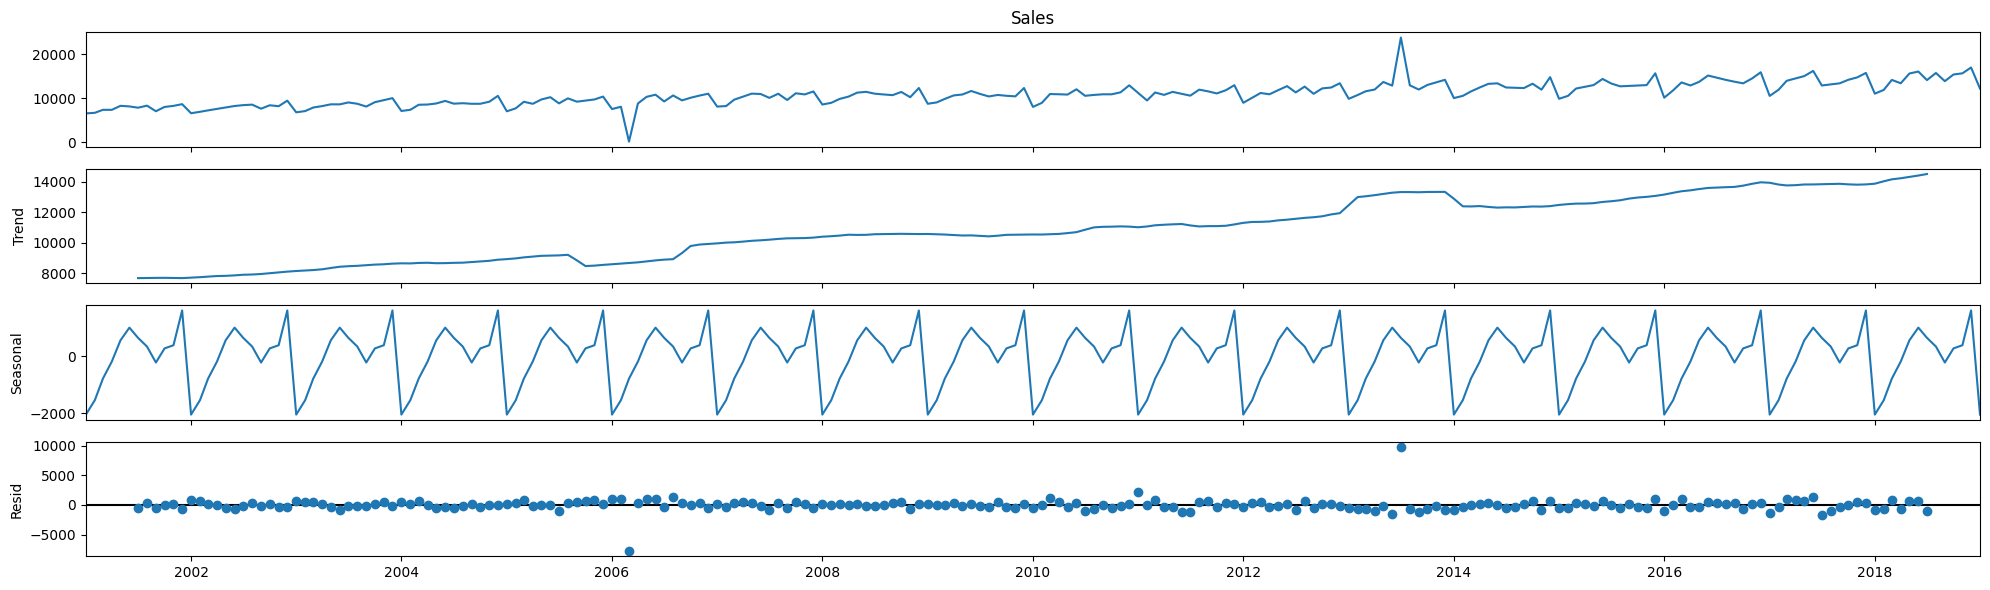

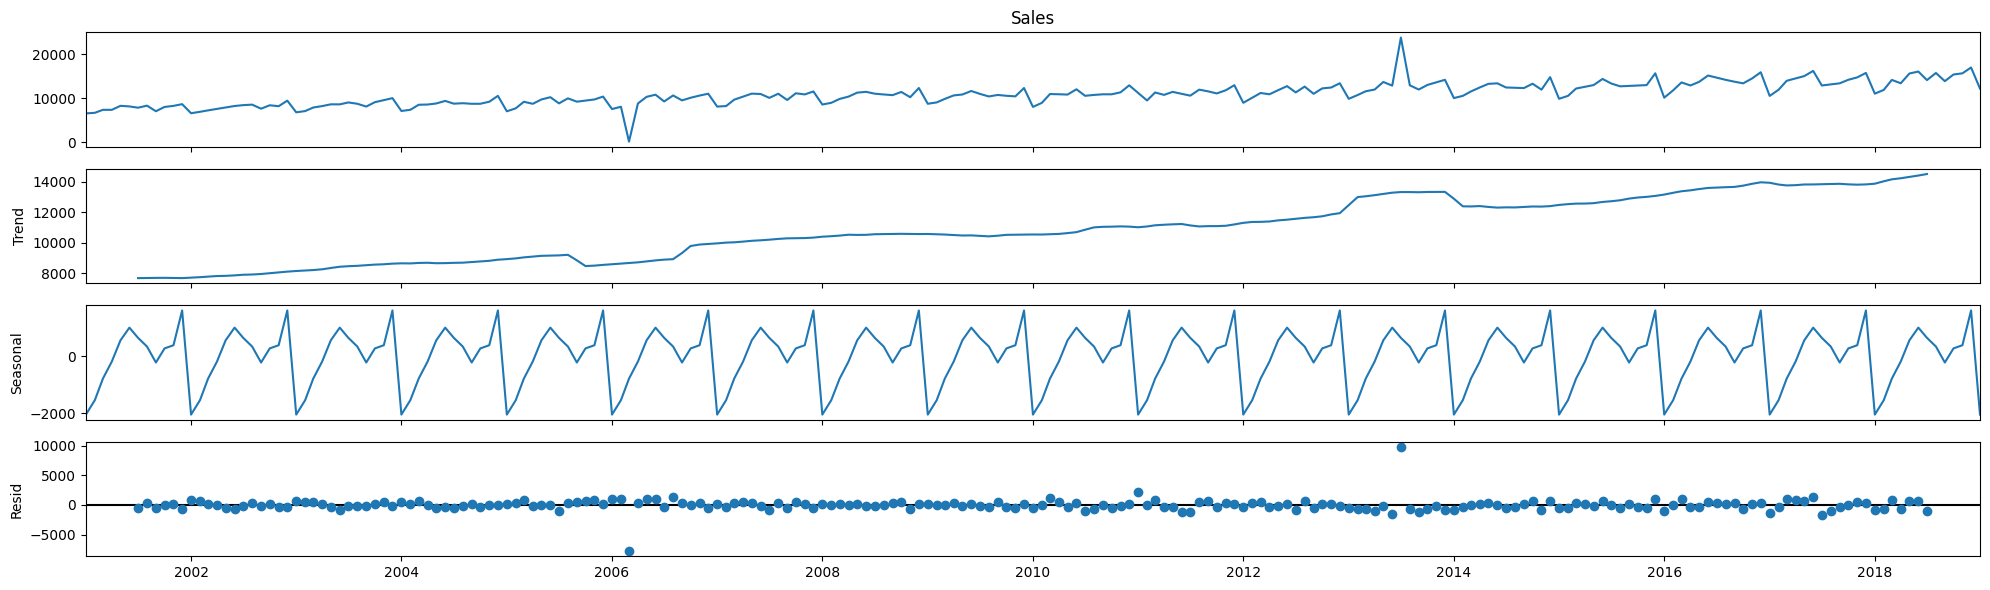

In [ ]:
model.plot()

<Axes: xlabel='DATE'>

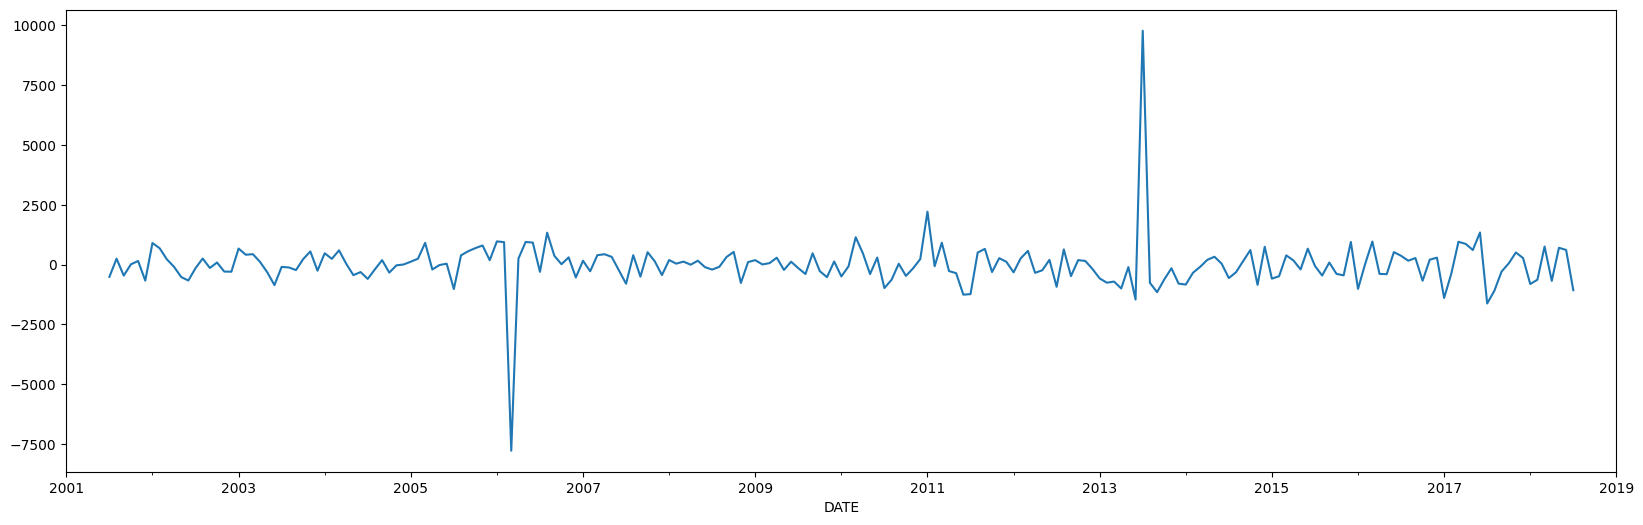

In [ ]:
model.resid.plot()

<Axes: >

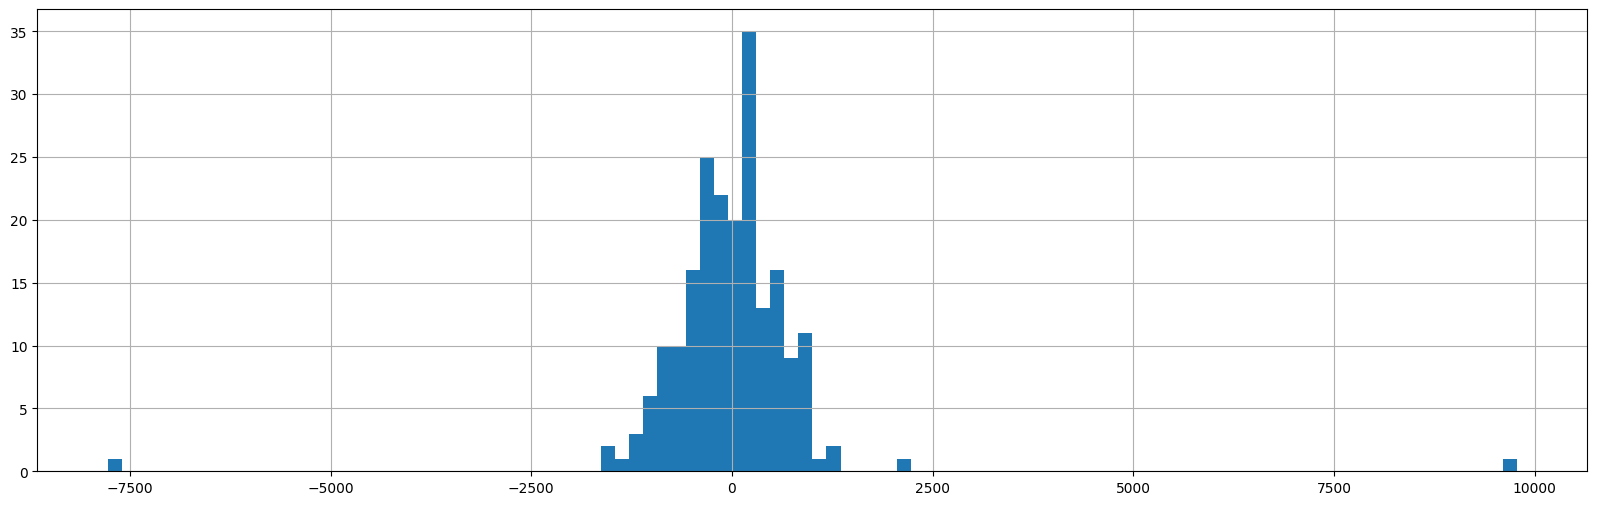

In [ ]:
model.resid.hist(bins=100)


In [ ]:
model.resid.mean()

-5.492136437908002

### Train-Test Split

In [ ]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x


,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,16021.0
2018-07-01,14080.0
2018-08-01,15697.0
2018-09-01,13838.0
2018-10-01,15351.0


### Evaluation Metric

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

### Forcasting the Mean

In [ ]:
train_x["Sales"].mean()

10657.741463414633

MAE : 3893.425
RMSE : 4175.798
MAPE: 0.259


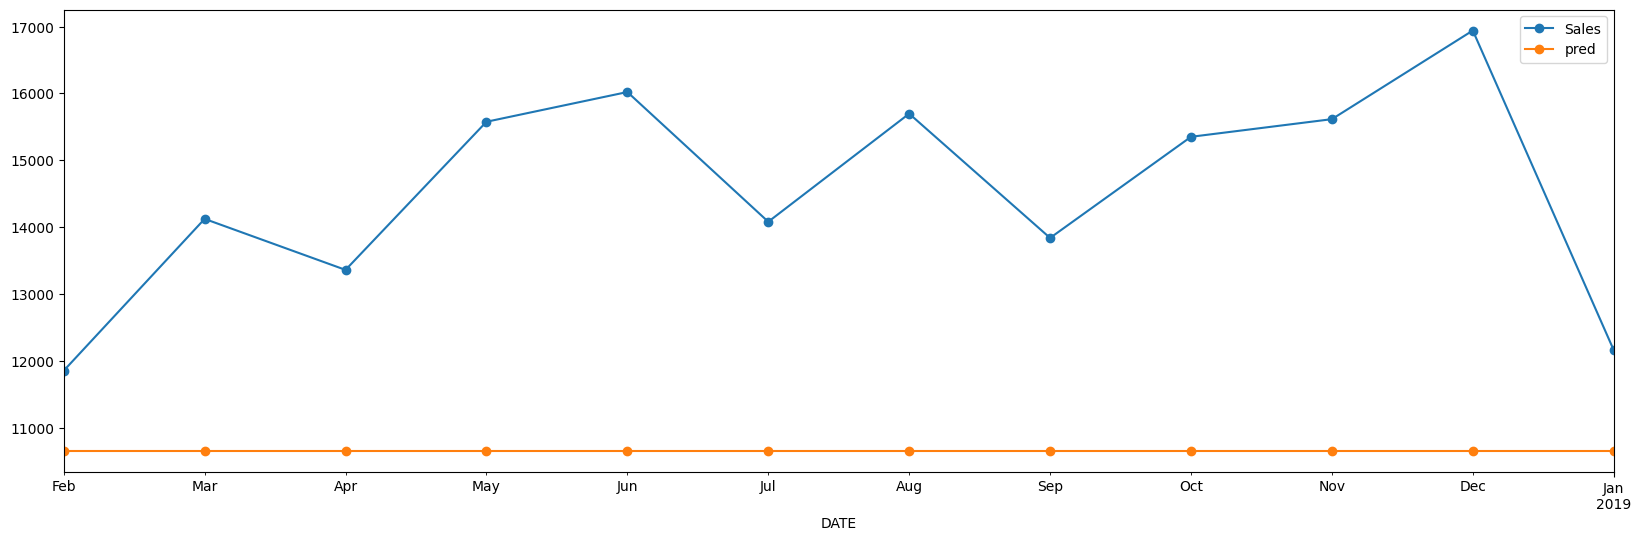

In [ ]:
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])


### Naive Method

In [ ]:
train_x['Sales'][-1]

<ipython-input-40-ebc7c2383a70>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_x['Sales'][-1]


11005.0

MAE : 3546.167
RMSE : 3854.067
MAPE: 0.235


<ipython-input-41-e0d468582818>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test_x['pred'] = train_x['Sales'][-1]


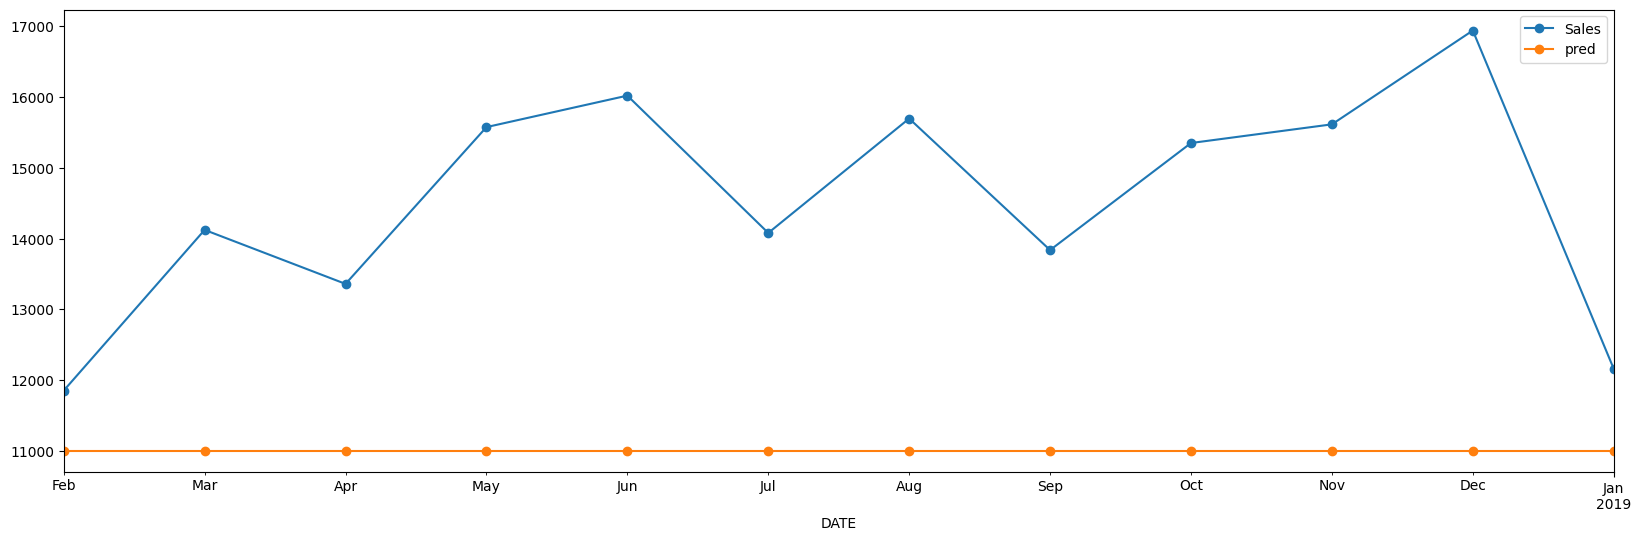

In [ ]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### Seasonal Naive

MAE : 907.417
RMSE : 1126.351
MAPE: 0.062


<ipython-input-42-9b5d194230fe>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']


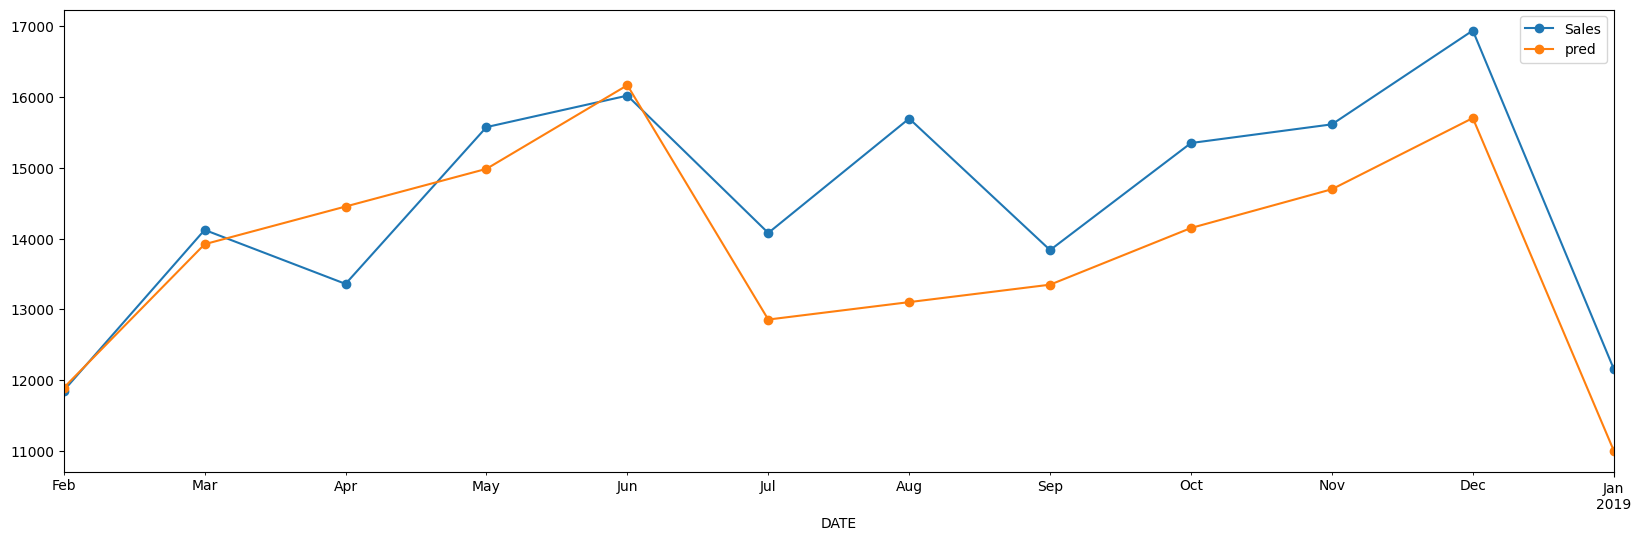

In [ ]:
test_x = test_x.copy()
for i in test_x.index:
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)]['Sales']

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### Drift Method

<ipython-input-43-c6825c577014>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_t = train_x['Sales'][-1]
<ipython-input-43-c6825c577014>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = (y_t - train_x['Sales'][0]) / len(train_x)


MAE : 3425.811
RMSE : 3735.003
MAPE: 0.227


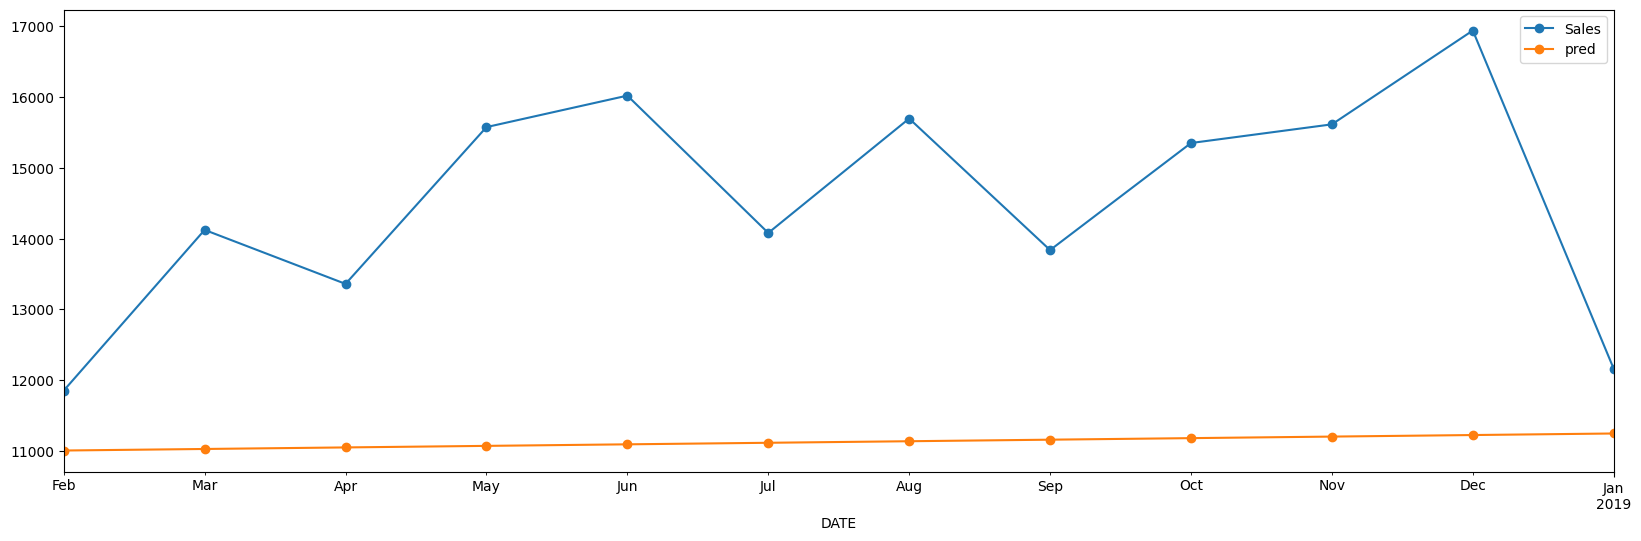

In [ ]:
# Get the slope
y_t = train_x['Sales'][-1]
m = (y_t - train_x['Sales'][0]) / len(train_x)
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

### Moving Average

In [ ]:
import numpy as np

df = mobile_sales.copy()


In [ ]:
df = pd.concat([df,pd.DataFrame(index = pd.date_range(start=df.index[-1], periods=13,freq='MS')[1:])])

print(df.tail(20))


              Sales
2018-06-01  16021.0
2018-07-01  14080.0
2018-08-01  15697.0
2018-09-01  13838.0
2018-10-01  15351.0
2018-11-01  15615.0
2018-12-01  16941.0
2019-01-01  12160.0
2019-02-01      NaN
2019-03-01      NaN
2019-04-01      NaN
2019-05-01      NaN
2019-06-01      NaN
2019-07-01      NaN
2019-08-01      NaN
2019-09-01      NaN
2019-10-01      NaN
2019-11-01      NaN
2019-12-01      NaN
2020-01-01      NaN


In [ ]:
pred = df.Sales.dropna().values

for i in range(12):
  pred = np.append(pred, pred[-3:].mean())

pred[-20:]

array([16021.        , 14080.        , 15697.        , 13838.        ,
       15351.        , 15615.        , 16941.        , 12160.        ,
       14905.33333333, 14668.77777778, 13911.37037037, 14495.16049383,
       14358.43621399, 14254.98902606, 14369.52857796, 14327.65127267,
       14317.38962557, 14338.1898254 , 14327.74357455, 14327.77434184])

<Axes: >

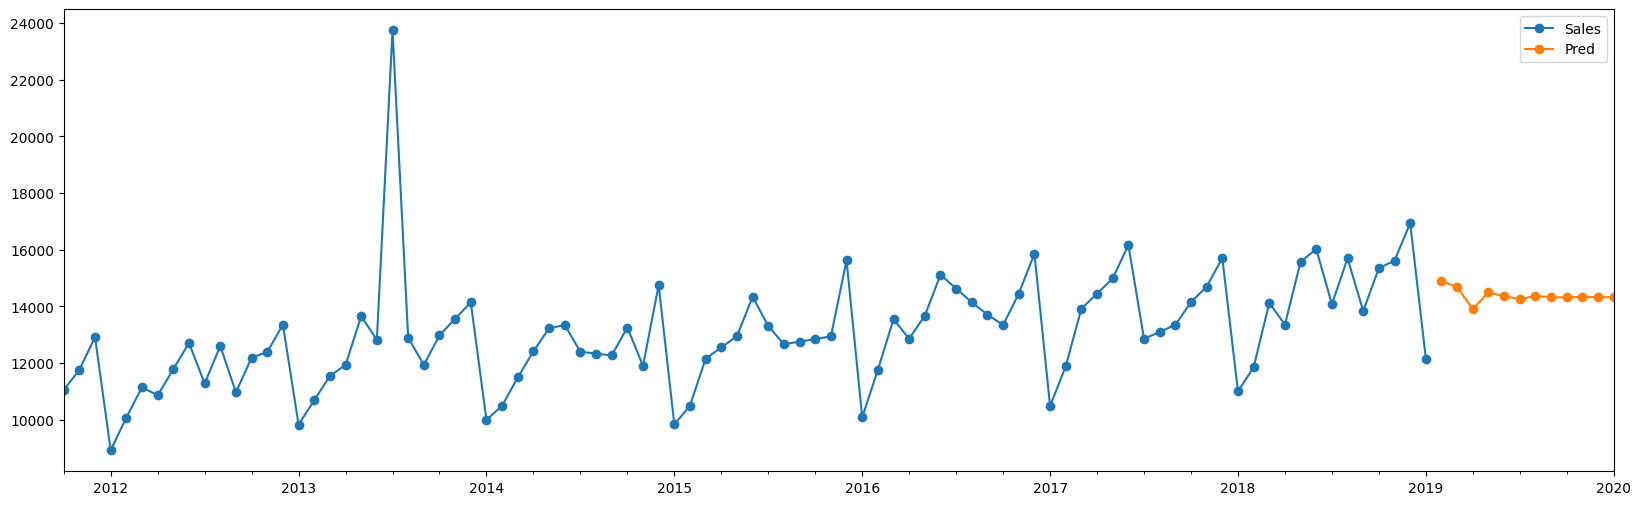

In [ ]:
df['Pred'] = pred

df.loc[~df['Sales'].isna(), 'Pred'] = np.nan
df.tail(100).plot(style='-o')